In [55]:
#importing all libraries required
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [56]:
#reading the dataset file and converting into a dataframe
data = pd.read_csv('Ecomm-DataSet.csv')
data.head(100)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pantalon de couleur unie à la mode pour femmes...,Women s New Fashion Solid Color Pants Loose Ca...,1.86,9,EUR,100,1,3.57,42,17.0,...,7248,3.943019,56c94ae6df108f5af83b1e0f,0,NaN,https://www.wish.com/c/5e958754a9136f26ddb12929,https://contestimg.wish.com/api/webimage/5e958...,5e958754a9136f26ddb12929,summer,2020-08
96,New Summer Fashion Women Striped Stitching Str...,New Summer Fashion Women Striped Stitching Str...,14.00,92,EUR,100,1,4.54,13,10.0,...,54,4.185185,5e72dc545021d6138b405bdc,0,NaN,https://www.wish.com/c/5eb8b430e015797901090ac0,https://contestimg.wish.com/api/webimage/5eb8b...,5eb8b430e015797901090ac0,summer,2020-08
97,Plus la taille des femmes de la mode lâche déc...,Plus Size Women's Fashion Loose Casual V neck ...,3.69,4,EUR,1000,0,3.64,212,95.0,...,1559,4.039128,5d40ffe372b0c94d00f6c1f0,0,NaN,https://www.wish.com/c/5e7f13c2bd7ab15d52e9b5f9,https://contestimg.wish.com/api/webimage/5e7f1...,5e7f13c2bd7ab15d52e9b5f9,summer,2020-08
98,Mode féminine sans manches col profond croix s...,Women Fashion Sleeveless Deep Neck Cross Spagh...,5.79,42,EUR,1000,0,3.32,121,36.0,...,5083,3.947472,566eaa533a698c6442549a74,0,NaN,https://www.wish.com/c/5d1db3c0e2b5cc0f74e091af,https://contestimg.wish.com/api/webimage/5d1db...,5d1db3c0e2b5cc0f74e091af,summer,2020-08


In [57]:
#Exploring Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [58]:
#Data Preprocessing

In [59]:
#checking if null values exists
data.isnull().sum()[data.isnull().sum() !=0]

rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
product_color                  41
product_variation_size_id      14
has_urgency_banner           1100
urgency_text                 1100
origin_country                 17
merchant_name                   4
merchant_info_subtitle          1
merchant_profile_picture     1347
dtype: int64

In [60]:
#ratings can be converted to 0 hence converting it to 0
data['rating_five_count'].replace(np.nan, 0, inplace=True)
data['rating_four_count'].replace(np.nan, 0, inplace=True)
data['rating_three_count'].replace(np.nan, 0, inplace=True)
data['rating_two_count'].replace(np.nan, 0, inplace=True)
data['rating_one_count'].replace(np.nan, 0, inplace=True)


In [61]:
#again checking the data
data.isnull().sum()[data.isnull().sum() !=0]

product_color                  41
product_variation_size_id      14
has_urgency_banner           1100
urgency_text                 1100
origin_country                 17
merchant_name                   4
merchant_info_subtitle          1
merchant_profile_picture     1347
dtype: int64

In [62]:
#The count of urgency_text and urgency_banner's null values are same.
#This denotes that the products which does not have urgency banner does not have urgency text.
#hence converting urgency banner it to 0
data['has_urgency_banner'].replace(np.nan, 0, inplace=True)

In [63]:
#again checking the data
data.isnull().sum()[data.isnull().sum() !=0]

product_color                  41
product_variation_size_id      14
urgency_text                 1100
origin_country                 17
merchant_name                   4
merchant_info_subtitle          1
merchant_profile_picture     1347
dtype: int64

In [64]:
#checking all the labels which contains categorical data
data.dtypes[data.dtypes == 'object']

title                        object
title_orig                   object
currency_buyer               object
tags                         object
product_color                object
product_variation_size_id    object
shipping_option_name         object
urgency_text                 object
origin_country               object
merchant_title               object
merchant_name                object
merchant_info_subtitle       object
merchant_id                  object
merchant_profile_picture     object
product_url                  object
product_picture              object
product_id                   object
theme                        object
crawl_month                  object
dtype: object

In [65]:
#Removing unnecessory class lables
data.drop(labels = ['title', 'title_orig', 'merchant_profile_picture', 'product_url', 'product_picture', 'product_id', 'merchant_id', 
                     'merchant_info_subtitle', 'merchant_name', 'merchant_title', 'shipping_option_name', 'urgency_text'], 
           axis=1, 
           inplace=True)

In [66]:
data.drop(labels = ['rating_count'], axis=1, inplace=True)

In [67]:
data.info()
#In the result we can see that we have removed the unnecessory class lables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_five_count             1573 non-null   float64
 7   rating_four_count             1573 non-null   float64
 8   rating_three_count            1573 non-null   float64
 9   rating_two_count              1573 non-null   float64
 10  rating_one_count              1573 non-null   float64
 11  badges_count                  1573 non-null   int64  
 12  badge_local_product           1573 non-null   int64  
 13  bad

In [68]:
#checking all the labels which contains categorical data
data.dtypes[data.dtypes == 'object']

currency_buyer               object
tags                         object
product_color                object
product_variation_size_id    object
origin_country               object
theme                        object
crawl_month                  object
dtype: object

In [69]:
#Checking different colours
count = data['product_color'].value_counts()
count

black          302
white          254
yellow         105
pink            99
blue            99
              ... 
jasper           1
wine red         1
light green      1
nude             1
whitestripe      1
Name: product_color, Length: 101, dtype: int64

In [70]:
#We have so many different colours,
#Club the different shades of colours into more generalized colours.
data['product_color'].replace('armygreen', 'green', inplace=True)
data['product_color'].replace('winered', 'red', inplace=True)
data['product_color'].replace('navyblue', 'blue', inplace=True)
data['product_color'].replace('lightblue', 'blue', inplace=True)
data['product_color'].replace('khaki', 'green', inplace=True)
data['product_color'].replace('gray', 'grey', inplace=True)
data['product_color'].replace('rosered', 'red', inplace=True)
data['product_color'].replace('skyblue', 'blue', inplace=True)
data['product_color'].replace('coffee', 'brown', inplace=True)
data['product_color'].replace('darkblue', 'blue', inplace=True)
data['product_color'].replace('rose', 'red', inplace=True)
data['product_color'].replace('fluorescentgreen', 'green', inplace=True)
data['product_color'].replace('navy', 'blue', inplace=True)
data['product_color'].replace('lightpink', 'pink', inplace=True)
data['product_color'].replace('orange-red', 'red', inplace=True)
data['product_color'].replace('Black', 'black', inplace=True)
data['product_color'].replace('lightgreen', 'green', inplace=True)
data['product_color'].replace('White', 'white', inplace=True)
data['product_color'].replace('wine', 'red', inplace=True)
data['product_color'].replace('Pink', 'pink', inplace=True)
data['product_color'].replace('Army green', 'green', inplace=True)
data['product_color'].replace('coralred', 'red', inplace=True)
data['product_color'].replace('lightred', 'red', inplace=True)
data['product_color'].replace('apricot', 'orange', inplace=True)
data['product_color'].replace('navy blue', 'blue', inplace=True)
data['product_color'].replace('burgundy', 'red', inplace=True)
data['product_color'].replace('silver', 'grey', inplace=True)
data['product_color'].replace('camel', 'brown', inplace=True)
data['product_color'].replace('lakeblue', 'blue', inplace=True)
data['product_color'].replace('lightyellow', 'yellow', inplace=True)
data['product_color'].replace('watermelonred', 'red', inplace=True)
data['product_color'].replace('coolblack', 'black', inplace=True)
data['product_color'].replace('applegreen', 'green', inplace=True)
data['product_color'].replace('mintgreen', 'green', inplace=True)
data['product_color'].replace('dustypink', 'pink', inplace=True)
data['product_color'].replace('ivory', 'white', inplace=True)
data['product_color'].replace('lightkhaki', 'green', inplace=True)
data['product_color'].replace('lightgray', 'grey', inplace=True)
data['product_color'].replace('darkgreen', 'green', inplace=True)
data['product_color'].replace('RED', 'red', inplace=True)
data['product_color'].replace('tan', 'brown', inplace=True)
data['product_color'].replace('jasper', 'red', inplace=True)
data['product_color'].replace('nude', 'white', inplace=True)
data['product_color'].replace('army', 'brown', inplace=True)
data['product_color'].replace('light green', 'green', inplace=True)
data['product_color'].replace('offwhite', 'white', inplace=True)
data['product_color'].replace('Blue', 'blue', inplace=True)
data['product_color'].replace('denimblue', 'blue', inplace=True)
data['product_color'].replace('Rose red', 'red', inplace=True)
data['product_color'].replace('lightpurple', 'purple', inplace=True)
data['product_color'].replace('prussianblue', 'blue', inplace=True)
data['product_color'].replace('offblack', 'black', inplace=True)
data['product_color'].replace('violet', 'purple', inplace=True)
data['product_color'].replace('gold', 'yellow', inplace=True)
data['product_color'].replace('wine red', 'red', inplace=True)
data['product_color'].replace('rosegold', 'red', inplace=True)
data['product_color'].replace('claret', 'red', inplace=True)
data['product_color'].replace('army green', 'green', inplace=True)
data['product_color'].replace('lightgrey', 'grey', inplace=True)

In [71]:
#checking the reduced number of colours
count = data['product_color'].value_counts()
count

black                  308
white                  260
blue                   164
red                    153
green                  150
yellow                 108
pink                   107
grey                    86
purple                  55
orange                  29
multicolor              20
brown                   18
beige                   14
white & green           10
floral                   5
black & green            4
leopard                  4
black & white            3
camouflage               3
pink & black             2
pink & white             2
pink & grey              2
black & blue             2
white & black            2
pink & blue              2
whitefloral              2
black & yellow           2
red & blue               1
blackwhite               1
white & red              1
rainbow                  1
star                     1
black & stripe           1
greysnakeskinprint       1
gray & white             1
orange & camouflage      1
blue & pink              1
l

In [72]:
#replacing all the null values
data['product_color'].replace(np.nan, 'others', inplace=True)

In [73]:
#Still we have lot of colours, we will furthermore club them 
#into shortergroups
def color(col):
    ls = ['black', 'white', 'blue', 'red', 'green', 'yellow', 'pink', 'grey', 'purple', 'orange', 'brown', 'beige']
    if col not in ls:
        if '&' in col:
            return 'dual'
        else:
            return 'others'
    return col

In [74]:
data['product_color'] = data['product_color'].apply(color)

In [75]:
#checking the colours
data['product_color'].value_counts()

black     308
white     260
blue      164
red       153
green     150
yellow    108
pink      107
grey       86
others     81
purple     55
dual       40
orange     29
brown      18
beige      14
Name: product_color, dtype: int64

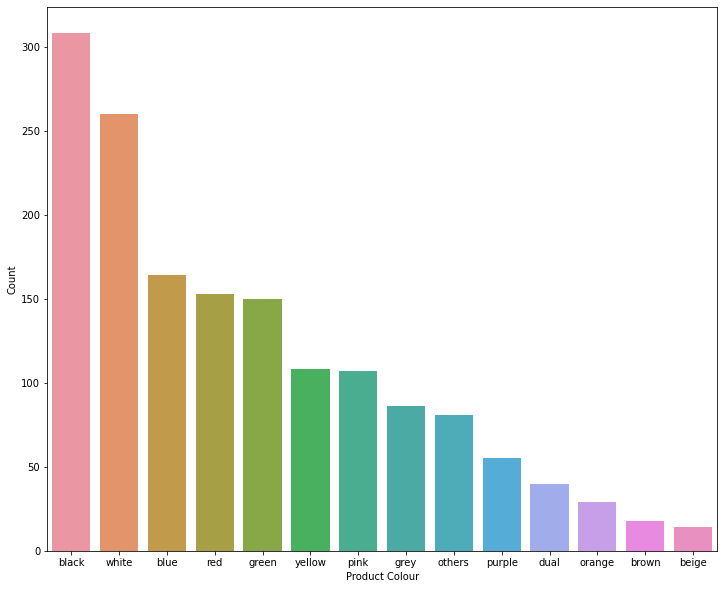

In [76]:
#plotting into graph for a better understanding
plt.figure(figsize=(12,10))
sns.countplot(x = 'product_color', data = data, order = data['product_color'].value_counts().iloc[:].index)
plt.xlabel('Product Colour')
plt.ylabel('Count')
plt.show()

In [77]:
#2 Checking Product Variation Size Id
count = data['product_variation_size_id'].value_counts()
count

S                               641
XS                              356
M                               200
XXS                             100
L                                49
                               ... 
100 x 100cm(39.3 x 39.3inch)      1
40 cm                             1
US-S                              1
10pcs                             1
S(Pink & Black)                   1
Name: product_variation_size_id, Length: 106, dtype: int64

In [78]:
data['product_variation_size_id'].replace('S.', 'S', inplace=True)
data['product_variation_size_id'].replace('Size S', 'S', inplace=True)
data['product_variation_size_id'].replace('XS.', 'XS', inplace=True)
data['product_variation_size_id'].replace('s', 'S', inplace=True)
data['product_variation_size_id'].replace('M.', 'M', inplace=True)
data['product_variation_size_id'].replace('2XL', 'XXL', inplace=True)
data['product_variation_size_id'].replace('Size XS', 'XS', inplace=True)
data['product_variation_size_id'].replace('Size-XS', 'XS', inplace=True)
data['product_variation_size_id'].replace('4XL', 'XXXXL', inplace=True)
data['product_variation_size_id'].replace('SIZE XS', 'XS', inplace=True)
data['product_variation_size_id'].replace('SizeL', 'L', inplace=True)
data['product_variation_size_id'].replace('Size-S', 'S', inplace=True)
data['product_variation_size_id'].replace('5XL', 'XXXXXL', inplace=True)
data['product_variation_size_id'].replace('3XL', 'XXXL', inplace=True)
data['product_variation_size_id'].replace('S(bust 88cm)', 'S', inplace=True)
data['product_variation_size_id'].replace('Size4XL', 'XXXXL', inplace=True)
data['product_variation_size_id'].replace('Size -XXS', 'XXS', inplace=True)
data['product_variation_size_id'].replace('SIZE-XXS', 'XXS', inplace=True)
data['product_variation_size_id'].replace('Size M', 'M', inplace=True)
data['product_variation_size_id'].replace('size S', 'S', inplace=True)
data['product_variation_size_id'].replace('S Pink', 'S', inplace=True)
data['product_variation_size_id'].replace('Size S.', 'S', inplace=True)
data['product_variation_size_id'].replace('Suit-S', 'S', inplace=True)

In [79]:
def size_name(size):
    ls = ["XXXS", "XXS", "XS", "S", "M", "L", "XL", "XXL", "XXXL", "XXXXL", "XXXXXL"]
    if size in ls:
        return size
    return "Others"

In [80]:
data['product_variation_size_id'].replace(np.nan, 'Others', inplace=True)
data['product_variation_size_id'] = data['product_variation_size_id'].apply(size_name)

In [81]:
#checking the class label
data['product_variation_size_id'].value_counts()

S         682
XS        369
M         206
XXS       104
Others    102
L          52
XXL        19
XL         17
XXXXL       9
XXXS        6
XXXXXL      4
XXXL        3
Name: product_variation_size_id, dtype: int64

In [82]:
#3.Origin Country
data['origin_country'].value_counts()

CN    1516
US      31
VE       5
SG       2
AT       1
GB       1
Name: origin_country, dtype: int64

In [83]:
#Except CN and US, we will club others as others
#becaust there count is less
def origin_name(country):
    ls = ["VE", "SG", "GB", "AT"]
    if country in ls:
        return "Others"
    return country
data['origin_country'].replace(np.nan, "Others", inplace=True)
data['origin_country'] = data['origin_country'].apply(origin_name)

In [84]:
#checking the class label
data['origin_country'].value_counts()

CN        1516
US          31
Others      26
Name: origin_country, dtype: int64

In [85]:
data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,theme,crawl_month
0,16.00,14,EUR,100,0,3.76,26.0,8.0,10.0,1.0,...,0,34,50,1.0,CN,568,4.128521,0,summer,2020-08
1,8.00,22,EUR,20000,1,3.45,2269.0,1027.0,1118.0,644.0,...,0,41,50,1.0,CN,17752,3.899673,0,summer,2020-08
2,8.00,43,EUR,100,0,3.57,5.0,4.0,2.0,0.0,...,0,36,50,1.0,CN,295,3.989831,0,summer,2020-08
3,8.00,8,EUR,5000,1,4.03,295.0,119.0,87.0,42.0,...,0,41,50,0.0,CN,23832,4.020435,0,summer,2020-08
4,2.72,3,EUR,100,1,3.10,6.0,4.0,2.0,2.0,...,0,35,50,1.0,CN,14482,4.001588,0,summer,2020-08


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_five_count             1573 non-null   float64
 7   rating_four_count             1573 non-null   float64
 8   rating_three_count            1573 non-null   float64
 9   rating_two_count              1573 non-null   float64
 10  rating_one_count              1573 non-null   float64
 11  badges_count                  1573 non-null   int64  
 12  badge_local_product           1573 non-null   int64  
 13  bad

In [87]:
data1=data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_five_count             1573 non-null   float64
 7   rating_four_count             1573 non-null   float64
 8   rating_three_count            1573 non-null   float64
 9   rating_two_count              1573 non-null   float64
 10  rating_one_count              1573 non-null   float64
 11  badges_count                  1573 non-null   int64  
 12  badge_local_product           1573 non-null   int64  
 13  bad

In [88]:
data1=data1.drop(['theme','crawl_month','origin_country','product_variation_size_id','product_color','tags','currency_buyer'], axis = 1)
data1.info()
data1.drop(data1.columns.difference(['price', 'retail_price', 'units_sold','rating_five_count']), 1, inplace=True)
data1['price'] = data1['price'].astype(int)
data1['rating_five_count'] = data1['rating_five_count'].astype(int)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   units_sold                    1573 non-null   int64  
 3   uses_ad_boosts                1573 non-null   int64  
 4   rating                        1573 non-null   float64
 5   rating_five_count             1573 non-null   float64
 6   rating_four_count             1573 non-null   float64
 7   rating_three_count            1573 non-null   float64
 8   rating_two_count              1573 non-null   float64
 9   rating_one_count              1573 non-null   float64
 10  badges_count                  1573 non-null   int64  
 11  badge_local_product           1573 non-null   int64  
 12  badge_product_quality         1573 non-null   int64  
 13  bad

In [89]:
#Data Reduction-Dimensionality Reduction
features = ['price', 'retail_price', 'units_sold','rating_five_count']
# Separating out the features
x = data1.loc[:, features].values

In [90]:
# Separating out the target
y = data1.loc[:,['rating_five_count']].values

In [91]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.627545,1.165887
1,2.521081,-0.156548
2,-0.595373,0.447938
3,-0.075005,-0.391309
4,-0.666339,-1.524452
...,...,...
1568,0.614707,-0.744157
1569,-0.570580,-0.293872
1570,-0.624309,-0.631287
1571,-0.652819,0.574638


In [93]:
#Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.
finalDf = pd.concat([principalDf, data1[['rating_five_count']]], axis = 1)

finalDf.to_csv("output.csv")

In [94]:
finalDf

,principal component 1,principal component 2,rating_five_count
0,-0.627545,1.165887,26
1,2.521081,-0.156548,2269
2,-0.595373,0.447938,5
3,-0.075005,-0.391309,295
4,-0.666339,-1.524452,6
...,...,...,...
1568,0.614707,-0.744157,722
1569,-0.570580,-0.293872,11
1570,-0.624309,-0.631287,24
1571,-0.652819,0.574638,0


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_five_count             1573 non-null   float64
 7   rating_four_count             1573 non-null   float64
 8   rating_three_count            1573 non-null   float64
 9   rating_two_count              1573 non-null   float64
 10  rating_one_count              1573 non-null   float64
 11  badges_count                  1573 non-null   int64  
 12  badge_local_product           1573 non-null   int64  
 13  bad

In [96]:
#Correlation between features
#Product Color
dummies_color = pd.get_dummies(data['product_color'], drop_first=True) # give us the one hot ecoded features
dummies_color.drop(labels = 'others', axis=1, inplace=True) # remove the 'others' feature as n-1 encoded features represents n features

In [97]:
# product variation size id
dummies_variation = pd.get_dummies(data['product_variation_size_id'])
dummies_variation.drop(labels = ['Others'], axis = 1, inplace=True)

In [98]:
#origin country
dummies_origin = pd.get_dummies(data['origin_country'])
dummies_origin.drop(labels=['Others'], axis = 1, inplace=True)

In [99]:
# concatenating all the one hot encoded features for the three categorical variables above

final = pd.concat([dummies_color, dummies_variation, dummies_origin, data['units_sold']], axis=1)
final.head(1)

,black,blue,brown,dual,green,grey,orange,pink,purple,red,...,XS,XXL,XXS,XXXL,XXXS,XXXXL,XXXXXL,CN,US,units_sold
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,100


In [100]:
feat_onehot = pd.concat([dummies_color, dummies_variation, dummies_origin, data['units_sold']], axis=1)
feat_onehot.head(1)

,black,blue,brown,dual,green,grey,orange,pink,purple,red,...,XS,XXL,XXS,XXXL,XXXS,XXXXL,XXXXXL,CN,US,units_sold
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,100


In [101]:
feat_onehot_corr = feat_onehot.corr()
feat_onehot_corr['units_sold'].sort_values(ascending=False)

units_sold    1.000000
M             0.107101
S             0.063655
black         0.046767
XL            0.042029
grey          0.041432
purple        0.037679
orange        0.034395
L             0.029851
CN            0.026664
XXXXXL        0.017198
white         0.008433
XXXL          0.003245
green        -0.016570
dual         -0.021030
XXL          -0.024689
XXXXL        -0.024773
XXXS         -0.027051
blue         -0.028643
brown        -0.028790
red          -0.030292
US           -0.044473
pink         -0.046868
yellow       -0.063270
XXS          -0.072489
XS           -0.112293
Name: units_sold, dtype: float64

In [102]:
#From the above result we can safely say that the dependency of units sold
#on the product color, variation size or origin country is very unlikely.
#For the same reason, we will DROP these three features.
data.drop(labels = ['product_color', 'product_variation_size_id', 'origin_country'], 
           axis=1, 
           inplace=True)

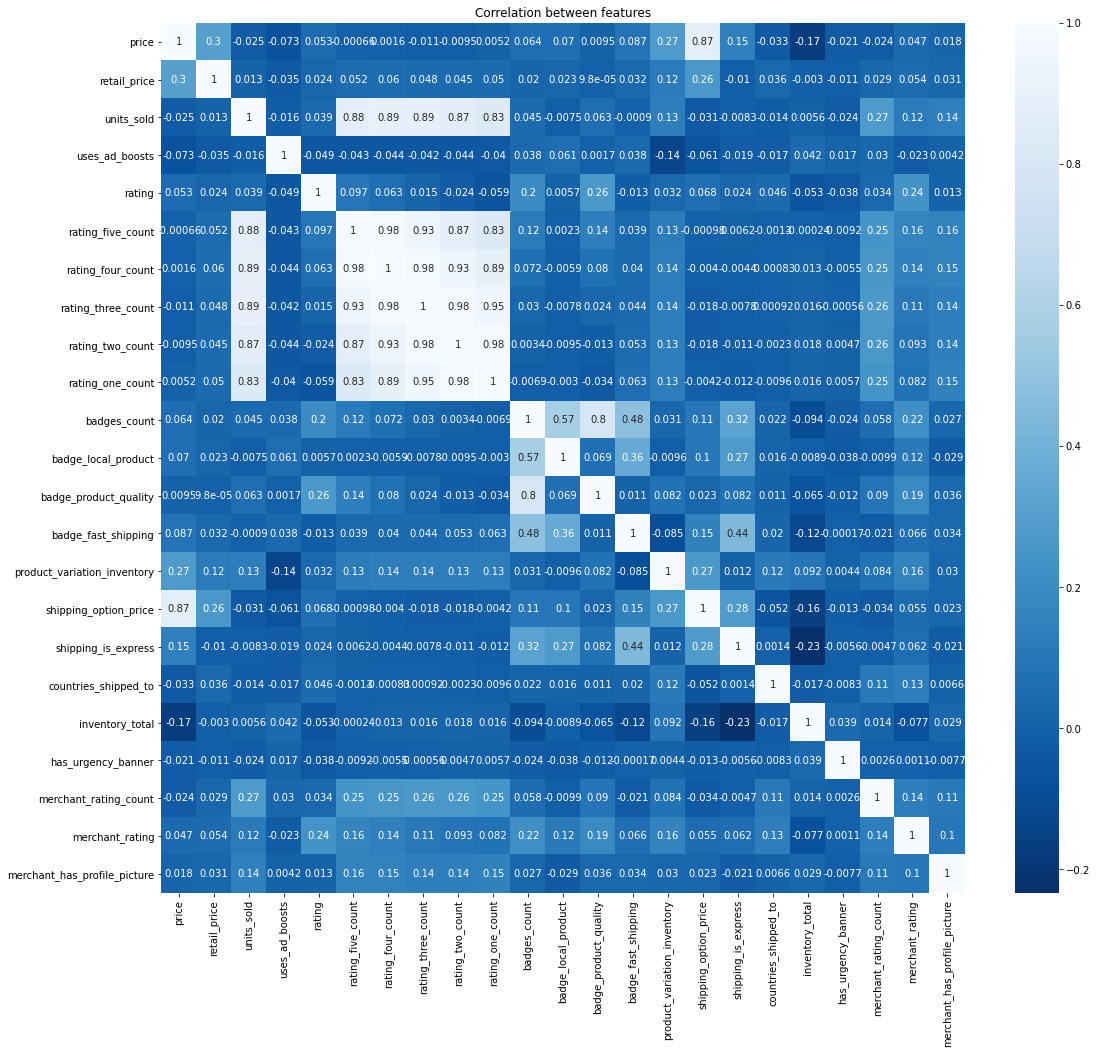

In [103]:
#The correlation between the rest of the features and units of the product sold
sales_corr = data.corr()
plt.figure(figsize = (18, 16))
sns.heatmap(sales_corr, annot=True, cmap='Blues_r')
plt.title('Correlation between features')
plt.show()